In [1]:
!ls /data/guided-diffusion/scale/rbf_ecp_marginal4.0 -ln | wc -l

6


Loaded data count: 6
saved -> /data/guided-diffusion/scale/rbf_ecp_marginal4.0/NFE=5,p=2.npz


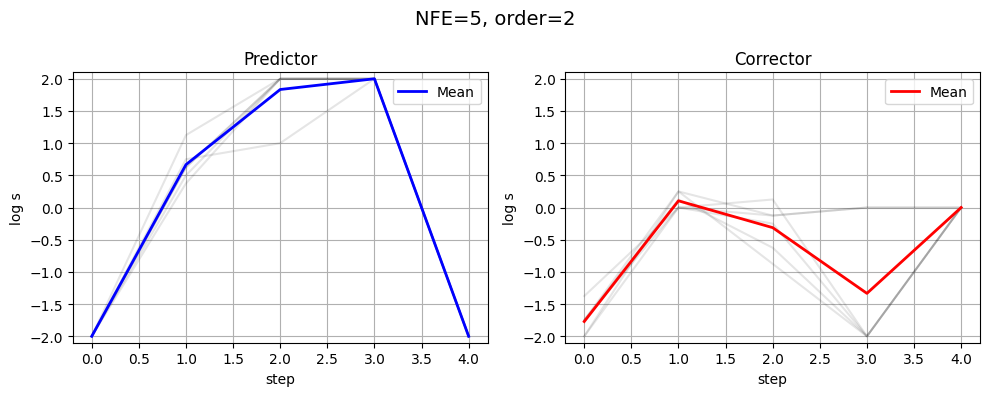

ValueError: need at least one array to stack

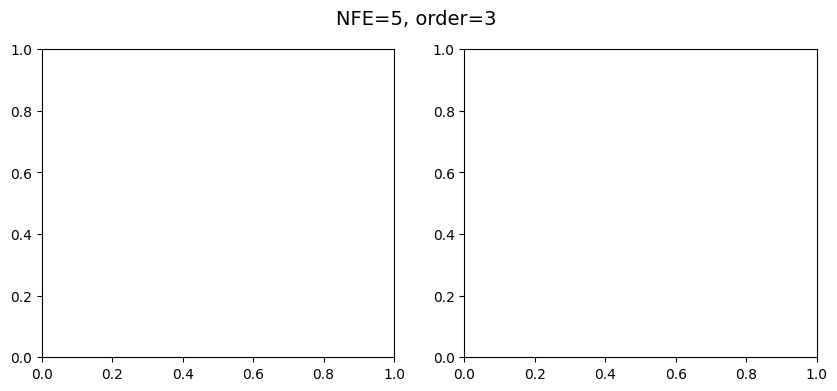

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

root_dir = '/data/guided-diffusion/scale/rbf_ecp_marginal4.0'

# 반복할 NFE와 order 리스트
nfe_list = [5, 10, 15, 20, 25, 30, 35, 40]
order_list = [2, 3]

for NFE in nfe_list:
    for order in order_list:
        optimal_log_scales_list = []

        # Figure와 2개의 서브플롯 생성
        fig, (ax_pred, ax_corr) = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(f"NFE={NFE}, order={order}", fontsize=14)

        # 20개 파일에 대해 데이터를 읽고 개별 그래프(검은 실선) 그리기
        for number in range(20):
            npz_file = os.path.join(root_dir, f'NFE={NFE},p={order},number={number}.npz')
            if not os.path.exists(npz_file):
                continue

            data = np.load(npz_file)
            # 첫 번째: Predictor
            ax_pred.plot(data['optimal_log_scales'][0],
                         color='black', alpha=0.1, label='_nolegend_')
            # 두 번째: Corrector
            ax_corr.plot(data['optimal_log_scales'][1],
                         color='black', alpha=0.1, label='_nolegend_')

            optimal_log_scales_list.append(data['optimal_log_scales'])

        # 평균값 계산 및 저장
        optimal_log_scales_arr = np.stack(optimal_log_scales_list, axis=0)
        print("Loaded data count:", len(optimal_log_scales_arr))

        optimal_log_scales_mean = np.mean(optimal_log_scales_arr, axis=0)
        save_file = os.path.join(root_dir, f'NFE={NFE},p={order}.npz')
        np.savez(save_file, optimal_log_scales=optimal_log_scales_mean)
        print('saved ->', save_file)

        # 평균 그래프 추가
        ax_pred.plot(optimal_log_scales_mean[0],
                     color='blue', linewidth=2.0, label='Mean')
        ax_corr.plot(optimal_log_scales_mean[1],
                     color='red', linewidth=2.0, label='Mean')

        # 서브플롯 설정
        ax_pred.set_title('Predictor')
        ax_pred.set_xlabel('step')
        ax_pred.set_ylabel('log s')
        ax_pred.set_ylim([-2.1, 2.1])
        ax_pred.grid(True)
        ax_pred.legend()

        ax_corr.set_title('Corrector')
        ax_corr.set_xlabel('step')
        ax_corr.set_ylabel('log s')
        ax_corr.set_ylim([-2.1, 2.1])
        ax_corr.grid(True)
        ax_corr.legend()

        # 레이아웃 조절 후 표시
        plt.tight_layout()
        plt.show()
